In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import os
import logging
import warnings
import matplotlib.pyplot as plt
import matplotlib

from edisgo import EDisGo
from edisgo.edisgo import import_edisgo_from_files
from edisgo.tools.plots import mv_grid_topology

%matplotlib inline

# suppress infos from pypsa
logger = logging.getLogger("pypsa")
logger.setLevel(logging.ERROR)

# suppress warnings
# disable for development
warnings.filterwarnings("ignore")

font = {'family' : 'Latin Modern Roman',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

C:\Users\Kilian.Helfenbein\.conda\envs\eDisGo_env\lib\site-packages\sqlalchemy\ext\declarative\base.py:436: SAWarning: Ignoring declarative-like tuple value of attribute 'segment': possibly a copy-and-paste error with a comma accidentally placed at the end of the line?
  "accidentally placed at the end of the line?" % k
C:\Users\Kilian.Helfenbein\.conda\envs\eDisGo_env\lib\site-packages\sqlalchemy\ext\declarative\base.py:436: SAWarning: Ignoring declarative-like tuple value of attribute 'cable': possibly a copy-and-paste error with a comma accidentally placed at the end of the line?
  "accidentally placed at the end of the line?" % k


In [2]:
ding0_dir = r"\\192.168.10.221\Daten_flexibel_01\ding0\20200812180021_merge"
grid_id = "176"

RLI_CMAP_CORPORATE_DESIGN = [
    (0, 46, 80),
    (51, 88, 115),
    (102, 130, 150),
    (153, 171, 185),
    (204, 213, 220),
    (166, 166, 166),
    (34, 116, 165),
    (68, 175, 105),
    (254, 127, 45),
    (241, 196, 15),
]

for count, color in enumerate(RLI_CMAP_CORPORATE_DESIGN):
    RGB = tuple([1/255 * x for x in color])
    RLI_CMAP_CORPORATE_DESIGN[count] = RGB

In [3]:
edisgo = EDisGo(
    ding0_grid=os.path.join(
        ding0_dir,
        grid_id
    ),
    worst_case_analysis='worst-case'
)

In [4]:
edisgo.plot_mv_grid_topology(
    technologies=True,
    node_color="technology",
    filename="grid_176_map.pdf",
)

In [5]:
directory = r"\\192.168.10.221\Daten_flexibel_02\simbev_results\eDisGo_curtailment_results\Electrification_2050_sensitivity_low_work\176\dumb"

edisgo_chunk = import_edisgo_from_files(
    directory=directory,
    import_topology=True,
    import_timeseries=False,
    import_results=False,
)

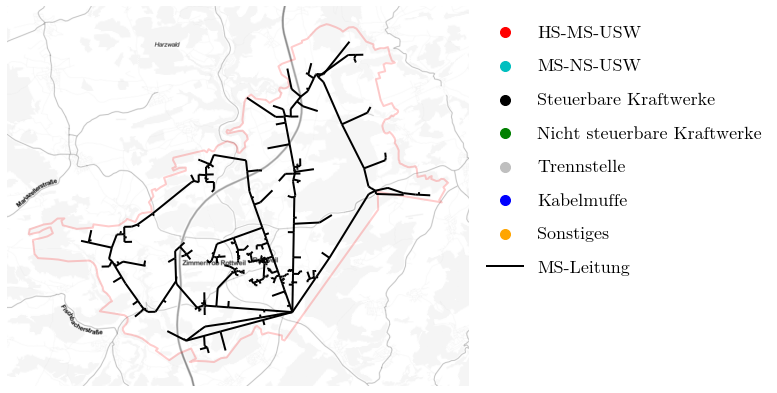

In [6]:
edisgo_chunk.plot_mv_grid_topology()#technologies=True)

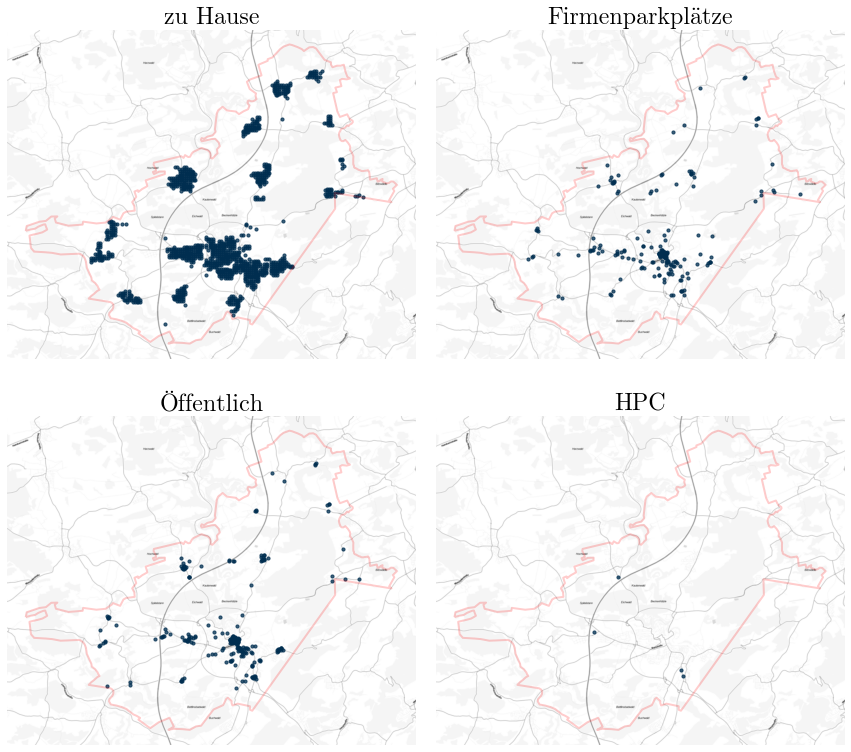

In [4]:
directory = r"\\192.168.10.221\Daten_flexibel_02\simbev_results\Electrification_2050_simbev_run\eDisGo_charging_time_series\176"
files = [
    "cp_data_home_within_grid_176.geojson",
    "cp_data_work_within_grid_176.geojson",
    "cp_data_public_within_grid_176.geojson",
    "cp_data_hpc_within_grid_176.geojson",
]

data_paths = [os.path.join(directory, f) for f in files]

fig, axs = plt.subplots(
    ncols=2,
    nrows=2,
    sharex=True,
    sharey=True,
    figsize=(15, 15),
)

titles = [
    "zu Hause",
    "Firmenparkplätze",
    "Öffentlich",
    "HPC",
]

i = 0

mv_grid_geom = edisgo.topology.grid_district["geom"] # 4326
gdf_boundary = gpd.GeoDataFrame(mv_grid_geom, crs={"init":"epsg:4326"}, columns=["geometry"]).to_crs(epsg=3857)

for row in range(2):
    for col in range(2):
        gdf = gpd.read_file(data_paths[i]).to_crs(epsg=3857).drop_duplicates(subset=["geometry"], keep='first')
        gdf.plot(
            ax=axs[row, col],
            alpha=0.75,
            color=RLI_CMAP_CORPORATE_DESIGN[0],
            markersize=10,
        )
        gdf_boundary.boundary.plot(
            ax=axs[row, col],
            alpha=0.2,
            color="red",
            linewidth=2,
        )
        
        ctx.add_basemap(
            axs[row, col],
            url=ctx.sources.ST_TONER_LITE,
        )
        axs[row, col].axis('off')
        
        axs[row, col].title.set_text(titles[i])
        
        i += 1
        
plt.subplots_adjust(
    wspace=0.05,  
    hspace=-0.1,
)

font = {'family' : 'Latin Modern Roman',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
        
plt.savefig(
    "cps_in_grid_176.pdf",
    bbox_inches='tight',
    dpi=300,
)

In [8]:
directory = r"\\192.168.10.221\Daten_flexibel_02\simbev_results\eDisGo_curtailment_results\Electrification_2050\176\dumb"

edisgo_dumb = import_edisgo_from_files(
    directory=directory,
    import_topology=True,
    import_timeseries=True,
    import_results=True,
)

directory = r"\\192.168.10.221\Daten_flexibel_02\simbev_results\eDisGo_curtailment_results\Electrification_2050\176\residual"

edisgo_residual = import_edisgo_from_files(
    directory=directory,
    import_topology=True,
    import_timeseries=True,
    import_results=True,
)

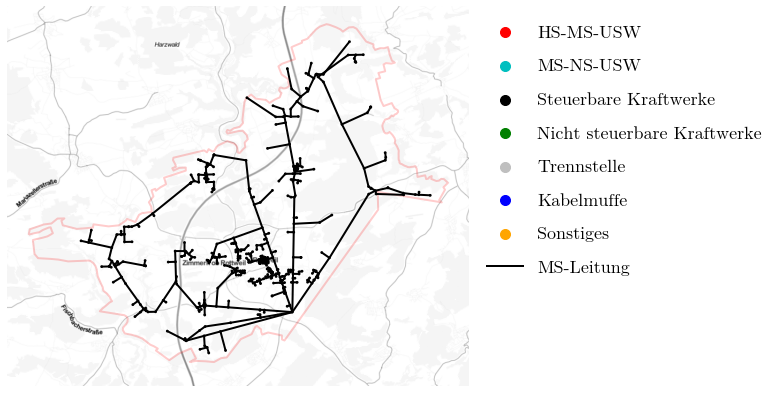

In [12]:
mv_grid_topology(
    edisgo_dumb,
    node_color="charging_park",
)